# Introduction¶

The International Phonetic Alphabet (IPA) is a standardized system of symbols used worldwide to represent the sounds and phonemes of spoken languages. In the context of the provided text, the passage delves into the intricate world of Bengali consonant phonemes. Bengali, as a language, features a rich array of consonant sounds, and there is ongoing discourse among linguists about how best to transcribe these sounds using IPA notation. Additionally, the passage sheds light on the fascinating influence of borrowed words from other languages, such as Arabic, Chinese, English, Farsi, and Portuguese, on Bengali pronunciation. For example, the tendency to use 'z' instead of 'j' or 'f' in place of 'pʰ' in certain instances. These phonetic nuances in Bengali present a challenge for transcription.

Moreover, the passage underscores the growing need for automated systems capable of accurately converting Bengali text into IPA notation. Given the vast audience and the myriad applications in fields such as linguistics, language learning, and phonetic research, such systems are becoming increasingly crucial. The complexity of Bengali and its position as one of the world's most widely spoken native languages make this endeavor all the more relevant. Accurate IPA transcription not only aids linguistic analysis but also facilitates language education and supports the advancement of phonetic research, ultimately contributing to a deeper understanding of this rich and diverse language. present this smartly for kaggle introduction


In [2]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("/kaggle/input/dataverse_2023/trainIPAdb_u.csv")
test_df = pd.read_csv("/kaggle/input/dataverse_2023/testData.csv", index_col="row_id_column_name")

In [3]:
train_df.isnull().sum()

text    0
ipa     0
dtype: int64

In [4]:
train_df.head()

,text,ipa
0,এরপরও তারা বকেয়া পরিশোধ করেনি।,eɾpɔɾo t̪ɐɾɐ bɔkeʲɐ poɾɪʃod̪ʱ kɔɾenɪ।
1,আগে সুইস ব্যাংকে জমা টাকার কোনো প্রতিবেদন প্রক...,ɐge suɪ̯s bɛŋke ɟɔmɐ tɐkɐɾ kono pɾot̪ɪbed̪ɔn p...
2,আদালত প্রতিষ্ঠানটি সিলগালা করে দেয়।,ɐd̪ɐlɔt̪ pɾot̪ɪʃtʱɐntɪ sɪlgɐlɐ koɾe d̪ee̯।
3,রায়ে তাদের দোষী সাব্যস্ত করা হলেও সাজা আগামী স...,ɾɐe t̪ɐd̪eɾ d̪oʃɪ ʃɐbbost̪o kɔɾɐ holeo̯ ʃɐɟɐ ɐ...
4,গ্রেফতারের পর থেকে তাদের বাঁচাতে এলাকার প্রভাব...,gɾepʰt̪ɐɾeɾ pɔɾ t̪ʰeke t̪ɐd̪eɾ bɐ̃cɐt̪e elɐkɐɾ...


# Data Preprocessing¶

In [5]:
temp = list(map(lambda x:x.split(), train_df.values[3]))

for bn, ipa in zip(temp[0], temp[1]):
    print(bn, " -> ", ipa)

রায়ে  ->  ɾɐe
তাদের  ->  t̪ɐd̪eɾ
দোষী  ->  d̪oʃɪ
সাব্যস্ত  ->  ʃɐbbost̪o
করা  ->  kɔɾɐ
হলেও  ->  holeo̯
সাজা  ->  ʃɐɟɐ
আগামী  ->  ɐgɐmɪ
সোমবার  ->  ʃombɐɾ
ঘোষণা  ->  gʱoʃonɐ
করা  ->  kɔɾɐ
হবে  ->  hɔbe
বলে  ->  bole
এক  ->  ɛk
প্রতিবেদনে  ->  pɾot̪ɪbed̪ɔne
জানিয়েছে  ->  ɟɐnɪʲecʰe
এনডিটিভি।  ->  endɪtɪbʱɪ।


In [6]:
train_unique_word = len(set(train_df["text"].sum().replace("।", " ").split()))
test_unique_word = len(set(test_df["text"].sum().replace("।", " ").split()))

In [7]:
oov = test_unique_word - train_unique_word          ## Out-of-vocabulary

In [8]:
print("Total unique words in train set: ", train_unique_word)
print("Total unique words in test set: ", test_unique_word)
print("\nOOV words: ", oov)

Total unique words in train set:  34816
Total unique words in test set:  44482

OOV words:  9666


In [9]:
import matplotlib.pyplot as plt

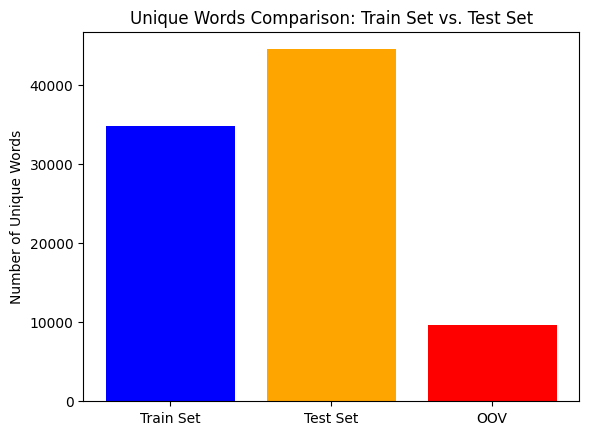

In [10]:
categories = ['Train Set', 'Test Set', 'OOV']
values = [train_unique_word, test_unique_word, oov]
colors = ['blue', 'orange', 'red']

plt.bar(categories, values, color=colors)
plt.ylabel('Number of Unique Words')
plt.title('Unique Words Comparison: Train Set vs. Test Set')
plt.show()


## Bengali numeral to Bengali word conversion


In [11]:
df_number = pd.read_csv("/kaggle/input/bengali-num/bengali_numbers.csv")

df_number.head()

,num_en,num_bn,word_bn
0,0,০০,শুন্য
1,1,০১,এক
2,2,০২,দুই
3,3,০৩,তিন
4,4,০৪,চার


> ## there's no ***Bengali Number*** present in the *training dataset* but the *test dataset* got ***Bengali Number***s..
> * #### About 30% of the test dataset include Bengali digits (সংখ্যা), while no such instances can be located in the training dataset.

In [14]:
pattern = r"[০১২৩৪৫৬৭৮৯]+"

train_df[train_df.text.str.contains(pattern, regex=True)]

,text,ipa


In [17]:
idx = test_df[test_df.text.str.contains(pattern, regex=True)].index
test_df[test_df.text.str.contains(pattern, regex=True)]

,text
row_id_column_name,
1,এ নিয়ে বিবাদে ২০১৫ সালের ২ জুন রাত সাড়ে ১১টায় ...
2,আজ থেকে ১৪ বছর আগে তিনি চলে গেছেন না ফেরার দেশে।
3,নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...
4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস ৪৮২ (করুনা...
5,"এগুলোর মধ্যে সাজ্জাদ হোসেনের ‘নন স্টপ’, আশুতোষ..."
...,...
12222,সাকিবের আগে টি ২০তে এই ‘ডাবল’ ছিল শুধু শহীদ আফ...
12224,দক্ষিণ কেরানীগঞ্জ থানার ওসি মনিরুল ইসলাম জানান...
12225,এতদিন এককভাবে শীর্ষে থাকলেও এখন ঢাকা আবাহনীও ত...


In [18]:
def apply_num_to_word(sent):
    ## checking if the given string is a bengali number:

    def isBengaliNumber(input_str):
        bengali_digits = ["০", "১", "২", "৩", "৪", "৫", "৬", "৭", "৮", "৯"]
        for char in input_str:
            if char not in bengali_digits:
                return False
        return True
    
    ## getting Word for a Bengali number:
    
    def getBengaliNumberWord(number_str):         
        if len(number_str) > 2:
            raise Exception("Only supports numbers from 00 to 99")
        if len(number_str) == 1:
            number_str = "০" + number_str
        result = df_number[df_number["num_bn"] == number_str]
        answer = result["word_bn"].values[0]

        return answer

    
    def convertBengaliNumber(num_str, digit_by_digit=False):
        if not isBengaliNumber(num_str):
            raise Exception(f"{num_str} The input should only contain Bengali numerals(০-৯)")

        result = ""
        if digit_by_digit:
            for digit in num_str:
                result += getBengaliNumberWord(digit) + " "
            return result

        if len(num_str) > 9:
            raise Exception("Num is too large")

        place_values = ["কোটি", "লক্ষ", "হাজার", "শো"]
        num_lengths = [7, 5, 3, 2]

        for i, length in enumerate(num_lengths):
            if len(num_str) > length:
                value = getBengaliNumberWord(num_str[:-length])
                num_str = num_str[-length:]
                if value != "শুন্য":
                    result += value + place_values[i] + " "

        value = getBengaliNumberWord(num_str)
        if value != "শুন্য":
            result += value

        return result if result != "" else "শুন্য"


    text = ""
    for word in sent.split(" "):
        try:
            isBengaliNumber(word)
            text += f"{convertBengaliNumber(word)} "
        except:
            text += f"{word} "
            pass
    return text.strip()


In [19]:
print(apply_num_to_word("১২৩৪৩৪৩৪"))
print(apply_num_to_word("৩৪১"))
print(apply_num_to_word("১৩"))
print(apply_num_to_word("৩"))

এককোটি তেইশলক্ষ তেতাল্লিশহাজার চারশো চৌত্রিশ
তিনশো একচল্লিশ
তেড়
তিন


In [20]:
test_df = test_df["text"].apply(apply_num_to_word).reset_index()

In [21]:
test_df

,row_id_column_name,text
0,0,বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার (ডন) অ্যাডিশ...
1,1,এ নিয়ে বিবাদে দুইহাজার পনের সালের দুই জুন রাত ...
2,2,আজ থেকে চৌদ্দ বছর আগে তিনি চলে গেছেন না ফেরার ...
3,3,নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...
4,4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস চারশো বিরা...
...,...,...
27223,27223,পছন্দের তারকার সঙ্গে কাজ করার সুযোগ পেয়ে অন্যর...
27224,27224,বাংলাদেশ রেলওয়ে সিলেট ডিভিশনের সহকারী নির্বাহী...
27225,27225,"প্রতিমন্ত্রী আরও বলেন, এসব প্যাকেট মিল্কভিটার ..."
27226,27226,এগুলো নিয়ে নয়া প্রচেষ্টা শুরু করেছে।


In [22]:
idx

Index([    1,     2,     3,     4,     5,     6,     7,    11,    12,    13,
       ...
       12216, 12217, 12218, 12220, 12221, 12222, 12224, 12225, 12226, 12227],
      dtype='int64', name='row_id_column_name', length=9602)

## NOTE 1:
> ## finally converted all Bengali nums to Bengali words to that corresponding IPA can be generated
> ### but still some remain undigested because of those aren't spaced, like: 
> ##### ***সাকিবের আগে টি ২০তে এই ‘ডাবল’ ছিল শুধু শহীদ আফ...***, 
> ##### ***নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...***

In [23]:
test_df.iloc[idx]

,row_id_column_name,text
1,1,এ নিয়ে বিবাদে দুইহাজার পনের সালের দুই জুন রাত ...
2,2,আজ থেকে চৌদ্দ বছর আগে তিনি চলে গেছেন না ফেরার ...
3,3,নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...
4,4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস চারশো বিরা...
5,5,"এগুলোর মধ্যে সাজ্জাদ হোসেনের ‘নন স্টপ’, আশুতোষ..."
...,...,...
12222,12222,সাকিবের আগে টি ২০তে এই ‘ডাবল’ ছিল শুধু শহীদ আফ...
12224,12224,দক্ষিণ কেরানীগঞ্জ থানার ওসি মনিরুল ইসলাম জানান...
12225,12225,এতদিন এককভাবে শীর্ষে থাকলেও এখন ঢাকা আবাহনীও ত...
12226,12226,আর ফেরিঙ্গা একহাজার নয়শো একান্ন সালে নেদারল্যা...


## Punctuations, special character cleaning except comma(,) and dadi(।)
> ### also removing ***URL***s, ***English Word***s cause they didn't got any corresponding IPA text
>
>
> * #### IPA transcription doesn't take into account English alphanumeric characters.


In [24]:
import re

In [25]:
def clean_bengali_text(sentence):
    ## Remove English URLs
    sentence = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", sentence)
    
    ## Remove English text
    sentence = re.sub(r"[a-zA-Z]+", "", sentence)
    
    ## Remove all punctuations except [, ।]
    sentence = re.sub(r"""[!@#$%^&*()_+={}\[\]:"\"'<>,?/\|\\-]""", "", sentence)
    
    ## Remove consecutive sequences of more than one full stop
    sentence = re.sub(r"\.{2,}", " ", sentence)
    
    ## Remove extra spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
    
    return sentence

def clean_ipa_text(sentence):
    ## Remove all punctuations
    sentence = re.sub(r"""[!@#$%^&*()_+={}\[\]:"\"'<>,?/\|\\-]""", "", sentence)
    
    ## Remove consecutive sequences of more than one full stop
    sentence = re.sub(r"\.{2,}", " ", sentence)
    
    ## Remove extra spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
    
    return sentence


In [26]:
url_regex = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"

with pd.option_context('display.max_colwidth', 0):
    display(train_df[train_df["text"].str.contains(url_regex, regex=True)])

,text,ipa
9905,টিকিট কাটতে http://ashajawa.com ওয়েব ঠিকানায় গিয়ে ই-মেইল ও ফোন নম্বর দিয়ে টিকিট অর্ডার করা যাবে।,tɪkɪt kɐtt̪e ://. oʲeb tʰɪkɐnɐe̯ gɪʲe ɪ-meɪ̯l o pʰon nɔmbɔɾ d̪ɪʲe tɪkɪt ɔɾdɐɾ kɔɾɐ ɟɐbe।
15195,চূড়ান্তভাবে উত্তীর্ণ পরীক্ষার্থীদের ফলাফল http://bou.ac.bd এবং সেমিস্টারভিত্তিক ফলাফল http:// exam.bou.edu.bd পাওয়া যাবে।,cuɽɐnt̪obʱɐbe ut̪t̪ɪɾno poɾɪkkʰɐɾt̪ʰɪd̪eɾ pʰɔlɐpʰɔl ://.. eboŋ ʃemɪstɐɾobʱɪt̪t̪ɪk pʰɔlɐpʰɔl :// ... pɐo̯ʷɐ ɟɐbe।
16119,আবেদনসহ ভর্তি প্রক্রিয়া সম্পর্কিত বিস্তারিত তথ্য বিশ্ববিদ্যালয়ের ওয়েবসাইট http://admission.ru. ac.bd-তে পাওয়া যাবে।,ɐbed̪ɔnʃɔho bʱɔɾt̪ɪ pɾokɾɪʲɐ ʃɔmpoɾkɪt̪o bɪst̪ɐɾɪt̪o t̪ot̪t̪ʰo bɪʃʃobɪd̪d̪ɐlɔʲeɾ oʷebʃɐɪ̯t ://.. .-t̪e pɐo̯ʷɐ ɟɐbe।
19767,প্রার্থীদের www.joinbangladesharmy.mil.bd অথবা http://army.teletalk.com.bd এই ওয়েবসাইটে ঢুকে আবেদন ফরম পূরণ করতে হবে।,pɾɐɾt̪ʰɪd̪eɾ ... ɔt̪ʰobɐ ://... eɪ̯ oʷebʃɐɪ̯te dʱuke ɐbed̪ɔn pʰɔɾom puɾon koɾt̪e hɔbe।


In [27]:
train_df["text"] = train_df["text"].apply(clean_bengali_text)
train_df["ipa"] = train_df["ipa"].apply(clean_ipa_text)

In [28]:
with pd.option_context('display.max_colwidth', 0):
    display(train_df.iloc[[9905, 15195, 16119, 19767], ])

,text,ipa
9905,টিকিট কাটতে ওয়েব ঠিকানায় গিয়ে ইমেইল ও ফোন নম্বর দিয়ে টিকিট অর্ডার করা যাবে।,tɪkɪt kɐtt̪e . oʲeb tʰɪkɐnɐe̯ gɪʲe ɪmeɪ̯l o pʰon nɔmbɔɾ d̪ɪʲe tɪkɪt ɔɾdɐɾ kɔɾɐ ɟɐbe।
15195,চূড়ান্তভাবে উত্তীর্ণ পরীক্ষার্থীদের ফলাফল এবং সেমিস্টারভিত্তিক ফলাফল পাওয়া যাবে।,cuɽɐnt̪obʱɐbe ut̪t̪ɪɾno poɾɪkkʰɐɾt̪ʰɪd̪eɾ pʰɔlɐpʰɔl eboŋ ʃemɪstɐɾobʱɪt̪t̪ɪk pʰɔlɐpʰɔl pɐo̯ʷɐ ɟɐbe।
16119,আবেদনসহ ভর্তি প্রক্রিয়া সম্পর্কিত বিস্তারিত তথ্য বিশ্ববিদ্যালয়ের ওয়েবসাইট .তে পাওয়া যাবে।,ɐbed̪ɔnʃɔho bʱɔɾt̪ɪ pɾokɾɪʲɐ ʃɔmpoɾkɪt̪o bɪst̪ɐɾɪt̪o t̪ot̪t̪ʰo bɪʃʃobɪd̪d̪ɐlɔʲeɾ oʷebʃɐɪ̯t .t̪e pɐo̯ʷɐ ɟɐbe।
19767,প্রার্থীদের অথবা এই ওয়েবসাইটে ঢুকে আবেদন ফরম পূরণ করতে হবে।,pɾɐɾt̪ʰɪd̪eɾ ɔt̪ʰobɐ eɪ̯ oʷebʃɐɪ̯te dʱuke ɐbed̪ɔn pʰɔɾom puɾon koɾt̪e hɔbe।


## Solving NOTE:1's problem
> #### previously some non-spaced bengali numerals couldn't converted into Words, let's fix them by making change in ***clean_bengali_text(sentence)*** func:
> #### sentence = " " + sentence
> #### extra regex: ***sentence = re.sub(r'(\d)(?![০-৯])', r'\1 ', sentence)***
>
> #### now result will look like:
> * ##### নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল      -->   নিহত ব্যক্তি কুতপালং টালের ই- ২ ব্লকের আবুল
> * ##### সাকিবের আগে টি ২০তে এই ‘ডাবল’ ছিল শুধু শহীদ -->   সাকিবের আগে টি ২০ তে এই ‘ডাবল’ ছিল শুধু শহীদ  

In [29]:
def clean_bengali_text(sentence):
    sentence = " " + sentence
    sentence = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", sentence)

    sentence = re.sub(r"[a-zA-Z]+", "", sentence)

    sentence = re.sub(r"""[!@#$%^&*()_+={}\[\]:"\"'‘’<>,?/\|\\-]""", "", sentence)
    
    ## new update
    sentence = re.sub(r'(\D)([০-৯]+)(\D)', r'\1 \2 \3', sentence)
    
    sentence = re.sub(r"\.{2,}", " ", sentence)
    
    sentence = re.sub(r"\s+", " ", sentence).strip()
    
    return sentence

clean_bengali_text("২০,সাকিবের আগে টি ২০তে এই, ‘ডাবল’ ছিল শুধু শহীদ|")

'২০ সাকিবের আগে টি ২০ তে এই ডাবল ছিল শুধু শহীদ'

In [30]:
train_df["text"] = train_df["text"].apply(clean_bengali_text)
test_df["text"] = test_df["text"].apply(clean_bengali_text)

In [31]:
train_df["text"] = train_df["text"].apply(apply_num_to_word)
test_df["text"] = test_df["text"].apply(apply_num_to_word)

In [32]:
with pd.option_context('display.max_colwidth', 0):
    display(test_df.iloc[idx])

,row_id_column_name,text
1,1,এ নিয়ে বিবাদে দুইহাজার পনের সালের দুই জুন রাত সাড়ে এগারো টায় চাচা সুশীল দাসকে কুপিয়ে জখম করে সে।
2,2,আজ থেকে চৌদ্দ বছর আগে তিনি চলে গেছেন না ফেরার দেশে।
3,3,নিহত ব্যক্তি কুতপালং টালের ই দুই ব্লকের আবুল বাছেদ চল্লিশ ।
4,4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস চারশো বিরাশি করুনারত্নে একশো ছিয়ানব্বই চান্দিমাল বাষট্টি ডিকভেলা বায়ান্ন পেরেরা আটান্ন ।
5,5,এগুলোর মধ্যে সাজ্জাদ হোসেনের নন স্টপ আশুতোষ সুজনের এই শহরে এবং রুলিন রহমানের রোড নাম্বার সাত বাসা নাম্বার তেড় ।
...,...,...
12222,12222,সাকিবের আগে টি বিশ তে এই ডাবল ছিল শুধু শহীদ আফ্রিদির।
12224,12224,দক্ষিণ কেরানীগঞ্জ থানার ওসি মনিরুল ইসলাম জানান রাত এক টার দিকে অগ্নিকাণ্ডের ঘটনা ঘটে।
12225,12225,এতদিন এককভাবে শীর্ষে থাকলেও এখন ঢাকা আবাহনীও তাদের সঙ্গে সমান বিয়াল্লিশ পয়েন্টে দাঁড়িয়ে।
12226,12226,আর ফেরিঙ্গা একহাজার নয়শো একান্ন সালে নেদারল্যান্ডসে জš§গ্রহণ করেন।


## Error metric: WER (Word Error Rate) 

In [33]:
## to calcuate given metric WER (Word Error Rate)
! pip install jiwer

# Train-test split

In [34]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, shuffle=True, random_state=3000)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
! pip install datasets

In [38]:
from datasets import Dataset

ds_train = Dataset.from_pandas(train_df)
ds_eval = Dataset.from_pandas(val_df)

In [39]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model_name = "google/mt5-base"

# Vectorization
> ### ***AutoTokenizer*** uses sentencepiece libaray in background

In [40]:
! pip install sentencepiece

In [41]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [42]:
tokenizer.vocab_size

250100


# Model Selection¶

1. LSTM Sequence-to-Sequence with Tokenization: Initially, we experimented with a raw LSTM sequence-to-sequence model and incorporated advanced techniques like SentencePiece tokenizer and Byte-Pair Encoding (BPE). Unfortunately, this approach yielded suboptimal results due to the limitations of our dataset's size.

2. MT5-Small: Our journey led us to explore the MT5-Small model, which demonstrated promise. However, we encountered a significant drawback – it proved to be considerably slower during the training phase, which posed an efficiency challenge.

3. MT5-Base: Finally, we transitioned to the MT5-Base model. This choice not only rectified the training speed issue but also elevated the quality of our outputs. The MT5-Base model emerged as the optimal solution, striking a balance between efficiency and performance, ultimately providing us with superior results.



In [43]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
data_collator = DataCollatorForSeq2Seq(tokenizer)

In [44]:
def transform_dataset(input_data):
    processed_data = tokenizer(input_data["text"])
    processed_data["labels"] = tokenizer(input_data["ipa"])['input_ids']
    processed_data["length"] = len(processed_data["labels"])
    
    return processed_data

custom_ds_train = ds_train.map(transform_dataset, remove_columns=ds_train.column_names)
custom_ds_eval = ds_eval.map(transform_dataset, remove_columns=ds_eval.column_names)


  0%|          | 0/17599 [00:00<?, ?ex/s]

  0%|          | 0/4400 [00:00<?, ?ex/s]

In [45]:
from datasets import load_metric

In [46]:
import numpy as np
from datasets import load_metric

wer_metric = load_metric("wer")


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    if isinstance(preds, tuple):
        preds = preds[0]
    
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"wer": result}

In [49]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

# Fine Tuning

In [50]:
model_name = "mt5-base-bn_to_ipa"
# we set num_train_epochs=3 , you can increase epochs for better output.
training_args = Seq2SeqTrainingArguments(
    output_dir=model_name,
    group_by_length=True,
    length_column_name="length",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    metric_for_best_model="wer",
    greater_is_better=False,
    load_best_model_at_end=True,
    num_train_epochs=3,
    save_steps=2500,
    eval_steps=2500,
    logging_steps=2500,
    learning_rate=3e-4,
    weight_decay=1e-2,
    warmup_steps=2000,
    save_total_limit=1,
    predict_with_generate=True,
    generation_max_length=128,
    push_to_hub=False,
    report_to="none",
)

# Model Traning

In [51]:
trainer = Seq2SeqTrainer(
    model = model,
    tokenizer = tokenizer,
    args = training_args,
    train_dataset = custom_ds_train,
    eval_dataset = custom_ds_eval,
    data_collator = data_collator,
    compute_metrics = compute_metrics
)

from time import time



In [52]:
t1 = time()

trainer.train()

t2 = time()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Wer
2500,2.667300,0.170924,0.178082
5000,0.218200,0.093767,0.089189
7500,0.118000,0.069066,0.063649
10000,0.079300,0.061626,0.051930
12500,0.060500,0.055821,0.046431


In [53]:
import datetime

timestamp = t2 - t1
formatted_time = str(datetime.timedelta(seconds = timestamp)).split()[0]

print("Training time: ", formatted_time)

Training time:  1:53:12.379882



# Model Saving


In [54]:
trainer.save_model(model_name)

In [69]:
import zipfile
import os

def zip_folder(folder_path, zip_filename):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through all files and subdirectories in the folder
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create the relative path to the file from the folder_path
                relative_path = os.path.relpath(os.path.join(root, file), folder_path)
                # Add the file to the zip archive with the same relative path
                zipf.write(os.path.join(root, file), relative_path)

if __name__ == "__main__":
    folder_path = "/kaggle/working/mt5-base-bn_to_ipa" 
    zip_filename = "/kaggle/working/mt5-base-bn_to_ipa/mt5-base-bn_to_ipa.zip"  
    zip_folder(folder_path, zip_filename)

OSError: [Errno 28] No space left on device

In [68]:
# import os

# zip_file_path = '/kaggle/working/mt5-base-bn_to_ipa/mt5-base-bn_to_ipa.zip'

# # Check if the file exists before attempting to delete it
# if os.path.exists(zip_file_path):
#     os.remove(zip_file_path)
#     print(f"{zip_file_path} has been deleted.")
# else:
#     print(f"{zip_file_path} does not exist.")

/kaggle/working/mt5-base-bn_to_ipa/mt5-base-bn_to_ipa.zip has been deleted.


# model load

In [64]:
import zipfile

In [ ]:
zip_file_path = '/kaggle/working/mt5-base-bn_to_ipa.zip'
destination_directory = '/kaggle/working/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

zip_ref.close()


In [56]:
# from time import time
from transformers import pipeline

translation_pipe = pipeline("text2text-generation", model=model_name, device=0)

In [57]:
temp_test = test_df.iloc[:10]             ## temporary test for 100 rows
temp_texts = temp_test["text"].tolist()
temp_ipas = list(map(lambda x:x["generated_text"], translation_pipe(temp_texts, max_length = 128, batch_size = 16)))

temp_test["ipa"] = temp_ipas
temp_test.head()

/tmp/ipykernel_32/3160811546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test["ipa"] = temp_ipas


,row_id_column_name,text,ipa
0,0,বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার ডন অ্যাডিশনা...,bɪʃeʃ ot̪ɪt̪hɪ ephem ɪkbɐl bɪn ɐnowɐɾ dɔn ɛdɪʃ...
1,1,এ নিয়ে বিবাদে দুইহাজার পনের সালের দুই জুন রাত ...,e nɪje bɪbɐd̪e d̪uɪ̯hɐɟɐɾ pɔneɾ ʃɐleɾ d̪uɪ̯ ɟu...
2,2,আজ থেকে চৌদ্দ বছর আগে তিনি চলে গেছেন না ফেরার ...,ɐɟ t̪heke cou̯d̪d̪o bɔchoɾ ɐge t̪ɪnɪ cɔle gɛch...
3,3,নিহত ব্যক্তি কুতপালং টালের ই দুই ব্লকের আবুল ব...,nɪhɔt̪o bɛkt̪ɪ kutpɐloŋ tɐleɾ ɪ d̪uɪ̯ blokeɾ ɐ...
4,4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস চারশো বিরা...,ʃɔŋkkhɪpt̪o skuɾsɾɪlɔŋkɐ pɾot̪hom ɪnɪŋʃo cɐɾʃo...


# Evaluation

In [ ]:
t1 = time()

texts = test_df["text"].tolist()
test_ipas = list(map(lambda x:x["generated_text"], translation_pipe(texts, max_length = 128, batch_size = 16)))

t2 = time()

In [ ]:
timestamp = t2 - t1
formatted_time = str(datetime.timedelta(seconds = timestamp)).split()[0]

print("test_df prediction time: ", formatted_time)

In [ ]:
test_df["ipa"] = test_ipas

# Submission

In [ ]:
test_df.drop("text", axis=1, inplace=True)

In [ ]:
test_df.to_csv("submission.csv")

In [58]:
import os

os.listdir()

['mt5-base-bn_to_ipa', '.virtual_documents']


# Phonetic Mapping Discrepancies in Bengali Text to IPA Transcription ;

### there's some Bengali sample texts given by our Host: (collected from dataverse_2023/data)

        1. ১৯ নভেম্বর নরেন্দ্র মোদি স্টেডিয়াম, বাংলাদেশ বিশ্বকাপ শিরোপা তুললো
        2. এক মাঘে শীত নাহি যায়
        3. কথায় বলে কথায় থাক
        4. কমলা সুন্দরীর পিন্দনের শাড়ি
        5. সৎকর্ম বৃথা যায় না

### so, our model is generating "ɐ" instead of "a" & "ɛ" instead of "æ" as you had proposed there, Sir. here's a quick overview -->

In [59]:
txt = [
    "১৯নভেম্বর নরেন্দ্র মোদি স্টেডিয়াম, বাংলাদেশ বিশ্বকাপ শিরোপা তুললো",
    "এক মাঘে শীত নাহি যায়",
    "কথায় বলে কথায় থাক",
    "কমলা সুন্দরীর পিন্দনের শাড়ি",
    "সৎকর্ম বৃথা যায় না"
]

t = pd.DataFrame({'text': txt})

t["processed_text"] = t["text"].apply(clean_bengali_text).apply(apply_num_to_word)

IPAs = list(map(lambda x:x["generated_text"], translation_pipe(t["processed_text"].tolist(), max_length=128, batch_size=16)))
t["ipa"] = IPAs

t

,text,processed_text,ipa
0,"১৯নভেম্বর নরেন্দ্র মোদি স্টেডিয়াম, বাংলাদেশ ব...",উনিশ নভেম্বর নরেন্দ্র মোদি স্টেডিয়াম বাংলাদেশ...,unɪʃ nɔbɦembɔɾ nɔɾend̪ɾo mod̪ɪ stedɪjɐm bɐŋlɐd...
1,এক মাঘে শীত নাহি যায়,এক মাঘে শীত নাহি যায়,ɛk mɐgɦe ʃɪt̪ nɐhɪ ɟɐe̯।
2,কথায় বলে কথায় থাক,কথায় বলে কথায় থাক,kɔt̪hɐe̯ bole kɔt̪hɐe̯ t̪hɐk।
3,কমলা সুন্দরীর পিন্দনের শাড়ি,কমলা সুন্দরীর পিন্দনের শাড়ি,kɔmlɐ ʃund̪oɾɪɾ pɪnd̪oneɾ ʃɐɽɪ।
4,সৎকর্ম বৃথা যায় না,সৎকর্ম বৃথা যায় না,ʃɔt̪kɔɾmo bɾɪt̪hɐ ɟɐe̯ nɐ।



# Introducing the Bengali and IPA Text Cleaner Class

    With our innovative Cleaner class, we've streamlined the entire preprocessing pipeline for Bengali and IPA text. This class empowers users to effortlessly process and clean Bengali text while ensuring it aligns with the International Phonetic Alphabet (IPA) standards. Whether you're working with linguistic data, language learning resources, or phonetic research, our Cleaner class simplifies the data preparation process, making it more accessible and efficient. Say goodbye to manual text cleaning and hello to streamlined, accurate phonetic transcription.



In [61]:
class Cleaner:
    def __init__(self):
        pass
    
    def clean_bengali_text(self, sentence): 
        sentence = " " + sentence
        sentence = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", sentence)
        sentence = re.sub(r"[a-zA-Z]+", "", sentence)
        sentence = re.sub(r"""[!@#$%^&*()_+={}\[\]:"\"'‘’<>,?/\|\\-]""", "", sentence)
        sentence = re.sub(r'(\D)([০-৯]+)(\D)', r'\1 \2 \3', sentence)
        sentence = re.sub(r"\.{2,}", " ", sentence)
        sentence = re.sub(r"\s+", " ", sentence).strip()

        return sentence


    def clean_ipa_text(self, sentence):
        sentence = re.sub(r"""[!@#$%^&*()_+={}\[\]:"\"'<>,?/\|\\-]""", "", sentence)
        sentence = re.sub(r"\.{2,}", " ", sentence)
        sentence = re.sub(r"\s+", " ", sentence).strip()

        return sentence


    def apply_num_to_word(self, sent):

        def isBengaliNumber(input_str):
            bengali_digits = ["০", "১", "২", "৩", "৪", "৫", "৬", "৭", "৮", "৯"]
            for char in input_str:
                if char not in bengali_digits:
                    return False
            return True

        ## getting Word for a Bengali number:

        def getBengaliNumberWord(number_str):         
            if len(number_str) > 2:
                raise Exception("Only supports numbers from 00 to 99")
            if len(number_str) == 1:
                number_str = "০" + number_str
            result = df_number[df_number["num_bn"] == number_str]
            answer = result["word_bn"].values[0]

            return answer


        def convertBengaliNumber(num_str, digit_by_digit=False):
            if not isBengaliNumber(num_str):
                raise Exception(f"{num_str} The input should only contain Bengali numerals(০-৯)")

            result = ""
            if digit_by_digit:
                for digit in num_str:
                    result += getBengaliNumberWord(digit) + " "
                return result

            if len(num_str) > 9:
                raise Exception("Num is too large")

            place_values = ["কোটি", "লক্ষ", "হাজার", "শো"]
            num_lengths = [7, 5, 3, 2]

            for i, length in enumerate(num_lengths):
                if len(num_str) > length:
                    value = getBengaliNumberWord(num_str[:-length])
                    num_str = num_str[-length:]
                    if value != "শুন্য":
                        result += value + place_values[i] + " "

            value = getBengaliNumberWord(num_str)
            if value != "শুন্য":
                result += value

            return result if result != "" else "শুন্য"


        text = ""
        for word in sent.split(" "):
            try:
                isBengaliNumber(word)
                text += f"{convertBengaliNumber(word)} "
            except:
                text += f"{word} "
                pass
            
        return text.strip()

In [62]:
cc = Cleaner()


# Usage

1. make a Pandas dataframe(df) with your bengali texts column name as text*
2. apply cc.clean_bengali_text() on them: df["text"].apply(cc.clean_bengali_text)
3. apply cc.apply_num_to_word() on them: df["text"].apply(cc.apply_num_to_word)
4. then predict the IPA transcript for each of the sentences using the translation_pipe() method.




# Conclusion

In our pursuit of building an efficient Bengali to IPA translator, we embarked on a journey that encompassed data cleaning, model selection, and performance optimization. We meticulously cleaned and prepared our Bengali to IPA dataset, addressing challenges like URL removal, Bengali numeral conversion, and the elimination of unnecessary English alphanumeric words.

Throughout this journey, we experimented with various models, beginning with a raw LSTM sequence-to-sequence model, enhanced with SentencePiece tokenizer and BPE. While this approach showed promise, dataset limitations proved to be a hindrance. Next, we explored the mt5-small model, which demonstrated better results but came with the trade-off of slower training times. Finally, we adopted the mt5-base model, which not only overcame the training speed issue but also provided superior output.

Our Cleaner class represents a significant step toward simplifying the data preparation process, ensuring that Bengali text aligns with IPA standards, and facilitating the broader use of our translation model in linguistics, language learning, and phonetic research. In conclusion, our journey led us to an effective model and a user-friendly tool for Bengali to IPA translation, promising accurate phonetic transcription while making the process more accessible and efficient for all.